In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nf
from netCDF4 import Dataset
%matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
datapath="/work/FAC/FGSE/IDYST/tbeucler/default/saranya/Data/ECMWF/ERA5_25kmx3hr/"
target="/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/create_ts/outputs/2016/"
p1="/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/create_ts/"

In [3]:
!ls /work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/create_ts/2016/

20160809_nio.csv  dianmu_wp.csv   ivette_ep.csv    madeline_ep.csv
20160816_nio.csv  earl_na.csv	  javier_ep.csv    malou_wp.csv
20160822_wp.csv   fiona_na.csv	  kay_ep.csv	   mindulle_wp.csv
20160827_na.csv   gaston_na.csv   kompasu_wp.csv   namtheun_wp.csv
chanthu_wp.csv	  hermine_na.csv  lester_ep.csv    newton_ep.csv
conson_wp.csv	  howard_ep.csv   lionrock_wp.csv  omais_wp.csv


In [4]:
dm1=xr.open_dataset(datapath+'/wind10/wind10_2016.nc')

In [5]:
#dm0=dm0.ws10[0:55,:,:]#for it in range(tc_irad.shape[0]):
   # latn, lats, lone, lonw = tc_irad[it,:]
    
    #dw10m[it,:,:]=dm0[it,:,:].sel(lat=slice(latn,lats),lon=slice(lone,lonw))[0:40,0:40]
    #ws[it]=np.max(dw10m[it,:,:])

In [6]:
dm1

<xarray.Dataset>
Dimensions:  (time: 2928, lat: 721, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2016-12-31T21:00:00
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
Data variables:
    wspd10   (time, lat, lon) float32 ...
Attributes:
    example_attr:  this is a global attribute

In [64]:
#nio tracks use latitude longitude instead of lat lon
track=pd.read_csv(p1+'2016/omais_wp.csv',delimiter=r",")
lon1=track['lon'].to_numpy()
lat1=track['lat'].to_numpy()
pos = arr = np.stack((lat1, lon1), axis=1)
pos.shape

(79, 2)

In [65]:
#for North Atlantic and East Pacific
lonx=np.mod(lon1,360)
pos = arr = np.stack((lat1, lonx), axis=1)
pos.shape

(79, 2)

In [66]:
pos

array([[ 16.7   , 148.8   ],
       [ 16.6926, 148.49  ],
       [ 16.7   , 148.2   ],
       [ 16.7475, 147.955 ],
       [ 16.9   , 147.8   ],
       [ 17.25  , 147.747 ],
       [ 17.58  , 147.82  ],
       [ 17.66  , 147.996 ],
       [ 17.7143, 148.186 ],
       [ 17.86  , 148.315 ],
       [ 18.05  , 148.4   ],
       [ 18.2175, 148.486 ],
       [ 18.4   , 148.55  ],
       [ 18.6212, 148.594 ],
       [ 18.8556, 148.622 ],
       [ 19.0625, 148.592 ],
       [ 19.225 , 148.267 ],
       [ 19.4004, 148.011 ],
       [ 19.6333, 147.773 ],
       [ 19.95  , 147.555 ],
       [ 20.35  , 147.45  ],
       [ 20.8112, 147.415 ],
       [ 21.325 , 147.425 ],
       [ 21.8738, 147.459 ],
       [ 22.4   , 147.5   ],
       [ 22.8162, 147.507 ],
       [ 23.225 , 147.525 ],
       [ 23.7338, 147.607 ],
       [ 24.25  , 147.675 ],
       [ 24.6819, 147.649 ],
       [ 25.125 , 147.6   ],
       [ 25.645 , 147.613 ],
       [ 26.225 , 147.6   ],
       [ 26.8512, 147.512 ],
       [ 27.5 

In [67]:
dm0=dm1.wspd10[1716:1795]

In [68]:

tc_irad=np.empty((pos.shape[0],4))
tc_irad[:,0] = pos[:,0]-5
tc_irad[:,1] = pos[:,0]+5
tc_irad[:,2] = pos[:,1]-5
tc_irad[:,3] = pos[:,1]+5

In [69]:
ws10=np.zeros((pos.shape[0],40,40))
ws=np.zeros((tc_irad.shape[0],))

In [70]:
tc_irad

array([[ 11.7   ,  21.7   , 143.8   , 153.8   ],
       [ 11.6926,  21.6926, 143.49  , 153.49  ],
       [ 11.7   ,  21.7   , 143.2   , 153.2   ],
       [ 11.7475,  21.7475, 142.955 , 152.955 ],
       [ 11.9   ,  21.9   , 142.8   , 152.8   ],
       [ 12.25  ,  22.25  , 142.747 , 152.747 ],
       [ 12.58  ,  22.58  , 142.82  , 152.82  ],
       [ 12.66  ,  22.66  , 142.996 , 152.996 ],
       [ 12.7143,  22.7143, 143.186 , 153.186 ],
       [ 12.86  ,  22.86  , 143.315 , 153.315 ],
       [ 13.05  ,  23.05  , 143.4   , 153.4   ],
       [ 13.2175,  23.2175, 143.486 , 153.486 ],
       [ 13.4   ,  23.4   , 143.55  , 153.55  ],
       [ 13.6212,  23.6212, 143.594 , 153.594 ],
       [ 13.8556,  23.8556, 143.622 , 153.622 ],
       [ 14.0625,  24.0625, 143.592 , 153.592 ],
       [ 14.225 ,  24.225 , 143.267 , 153.267 ],
       [ 14.4004,  24.4004, 143.011 , 153.011 ],
       [ 14.6333,  24.6333, 142.773 , 152.773 ],
       [ 14.95  ,  24.95  , 142.555 , 152.555 ],
       [ 15.35  ,  2

In [71]:
ws.shape

(79,)

In [72]:
for it in range(tc_irad.shape[0]):
    latn, lats, lone, lonw = tc_irad[it,:]
    #test.append(dm.slp[it,:,:].sel(lat=slice(latn,lats),lon=slice(lone,lonw)))
    ws10[it,:,:]=dm0[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw))[0:40,0:40]
    ws[it]=np.max(ws10[it,:,:])

In [73]:
ws

array([11.14303589, 12.57185459, 12.2812748 , 12.46559429, 13.50075245,
       13.63790894, 13.82043076, 14.80530167, 15.00391579, 16.9752388 ,
       17.86558533, 16.79210663, 16.51339912, 15.52302456, 15.44356632,
       15.44692802, 18.36073303, 17.43354416, 19.64691544, 21.25785446,
       19.84442139, 18.15441513, 16.61643791, 17.65916824, 21.60000038,
       21.93190765, 22.30150604, 20.6508522 , 23.73887062, 24.22815895,
       23.51335335, 24.72798157, 27.44359207, 27.26222038, 27.49015999,
       27.74765205, 23.98935318, 25.9320755 , 25.50935745, 26.21388626,
       23.93493652, 23.34496689, 23.64629745, 22.56626511, 23.5705452 ,
       24.01645279, 23.05558586, 22.64930725, 24.60996246, 24.01620674,
       21.65947533, 22.43209648, 22.67760277, 22.56469727, 21.8448925 ,
       21.30020523, 20.56199265, 20.33889389, 19.98843956, 19.95511818,
       19.74359703, 19.72117996, 19.90283775, 20.64637566, 20.24144745,
       20.5631485 , 20.33859634, 19.96626854, 20.17459297, 20.01

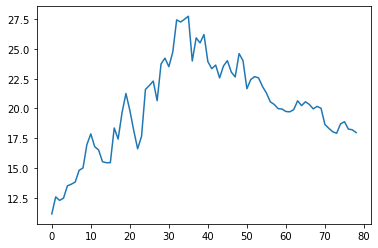

In [74]:
plt.plot(ws)
plt.show()

In [75]:
df = pd.DataFrame(data=ws, columns=["w10max"])

,w10max
0,11.143036
1,12.571855
2,12.281275
3,12.465594
4,13.500752
...,...
74,18.706930
75,18.884609
76,18.274042
77,18.209545


In [77]:
df.to_csv(target+'2016_wmax_wp_omais.csv')